###  Import Data and Required Packages


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv("mumbai-house-price-data-cleaned.csv")

In [11]:
df.drop(columns=['title', 'age', "total_floors","price_per_sqft","area"], inplace=True , axis=1) # Not useful


In [12]:
df.head()

price     locality    city property_type  bedroom_num  bathroom_num  \
0   6600283       Kalyan  Mumbai     Apartment            2             2   
1   6169841       Kalyan  Mumbai     Apartment            2             2   
2   4599936    Dombivali  Mumbai     Apartment            1             1   
3  51980000  Ville Parle  Mumbai     Apartment            3             3   
4   3915000  Nala Sopara  Mumbai     Apartment            1             1   

   balcony_num    furnished   latitude  longitude  
0            0  Unfurnished  19.244410  73.123253  
1            0  Unfurnished  19.257294  73.148872  
2            0  Unfurnished  19.209026  73.081276  
3            0  Unfurnished  19.097841  72.851158  
4            0  Unfurnished  19.420601  72.809319

In [13]:
df.furnished.unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [14]:
df.isnull().sum()

price            0
locality         0
city             0
property_type    0
bedroom_num      0
bathroom_num     0
balcony_num      0
furnished        0
latitude         0
longitude        0
dtype: int64

In [15]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
71933    False
71934    False
71935    False
71936    False
71937    False
Length: 71938, dtype: bool

In [16]:
df.drop_duplicates()

price     locality            city property_type  bedroom_num  \
0       6600283       Kalyan          Mumbai     Apartment            2   
1       6169841       Kalyan          Mumbai     Apartment            2   
2       4599936    Dombivali          Mumbai     Apartment            1   
3      51980000  Ville Parle          Mumbai     Apartment            3   
4       3915000  Nala Sopara          Mumbai     Apartment            1   
...         ...          ...             ...           ...          ...   
71933  38931000        Dadar    Mumbai South     Apartment            2   
71934  54663000        Dadar    Mumbai South     Apartment            3   
71935  15135866      Andheri  Western Mumbai     Apartment            1   
71936  25500000      Andheri  Western Mumbai     Apartment            2   
71937  27384000      Andheri  Western Mumbai     Apartment            3   

       bathroom_num  balcony_num    furnished   latitude  longitude  
0                 2            0  Unfurnished  19.244410  73.123253  
1                 2            0  Unfurnished  19.257294  73.148872  
2                 1            0  Unfurnished  19.209026  73.081276  
3                 3            0  Unfurnished  19.097841  72.851158  
4                 1            0  Unfurnished  19.420601  72.809319  
...             ...          ...          ...        ...        ...  
71933             2            0    Furnished  19.018014  72.832026  
71934             3            0    Furnished  19.018014  72.832026  
71935             1            0    Furnished  19.124240  72.842760  
71936             2            0    Furnished  19.124240  72.842760  
71937             3            0    Furnished  19.124240  72.842760  

[49977 rows x 10 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71938 entries, 0 to 71937
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          71938 non-null  int64  
 1   locality       71938 non-null  object 
 2   city           71938 non-null  object 
 3   property_type  71938 non-null  object 
 4   bedroom_num    71938 non-null  int64  
 5   bathroom_num   71938 non-null  int64  
 6   balcony_num    71938 non-null  int64  
 7   furnished      71938 non-null  object 
 8   latitude       71938 non-null  float64
 9   longitude      71938 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 5.5+ MB


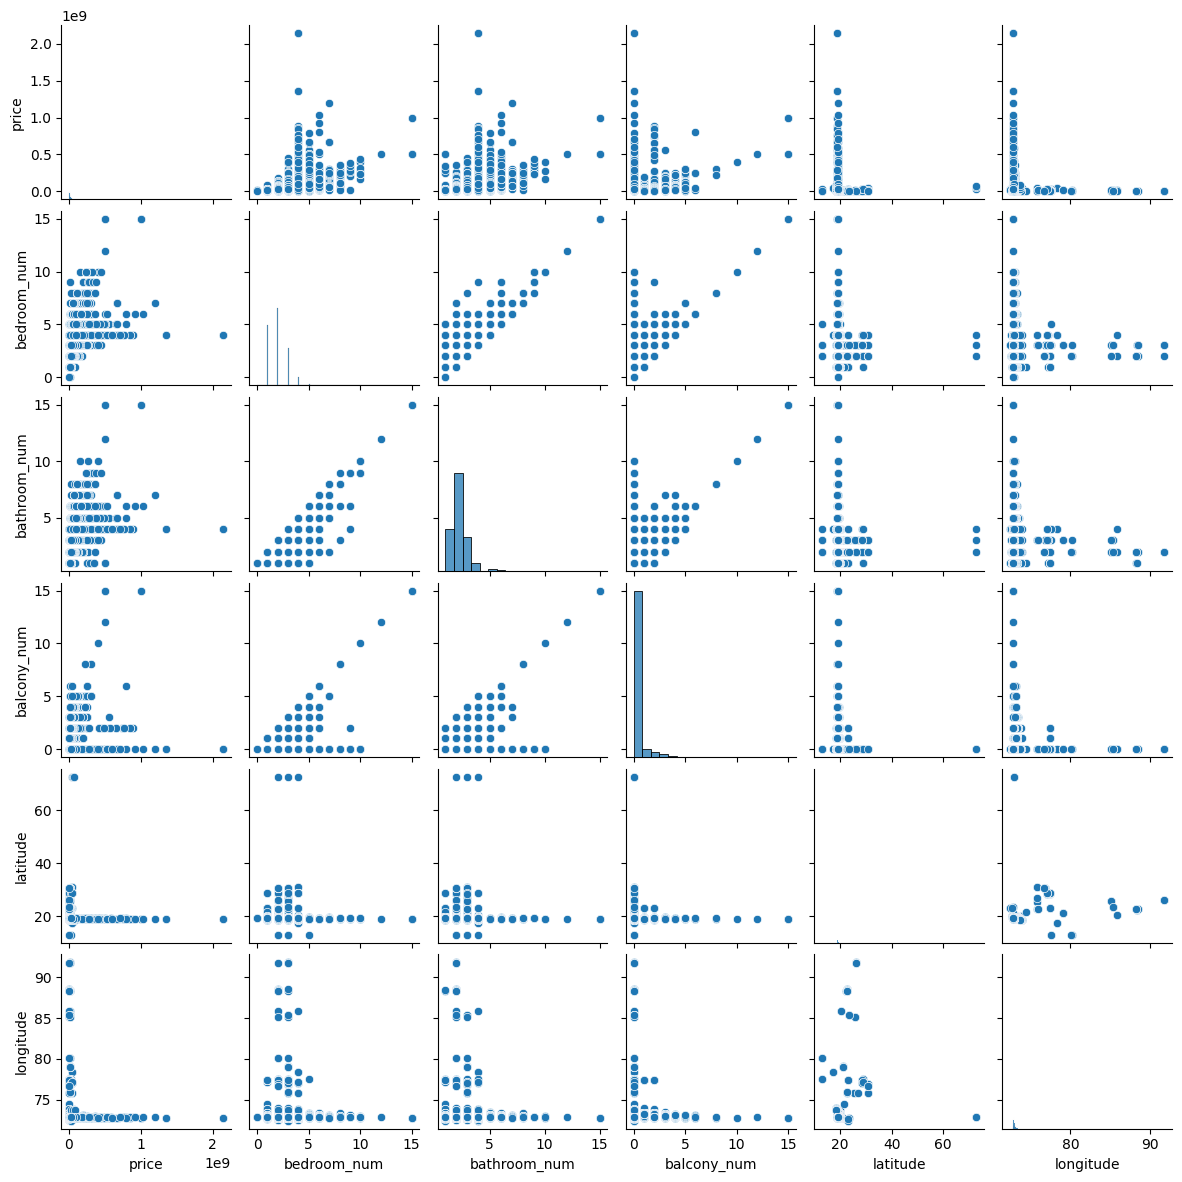

In [18]:
sns.pairplot(df,height=2)
plt.show()

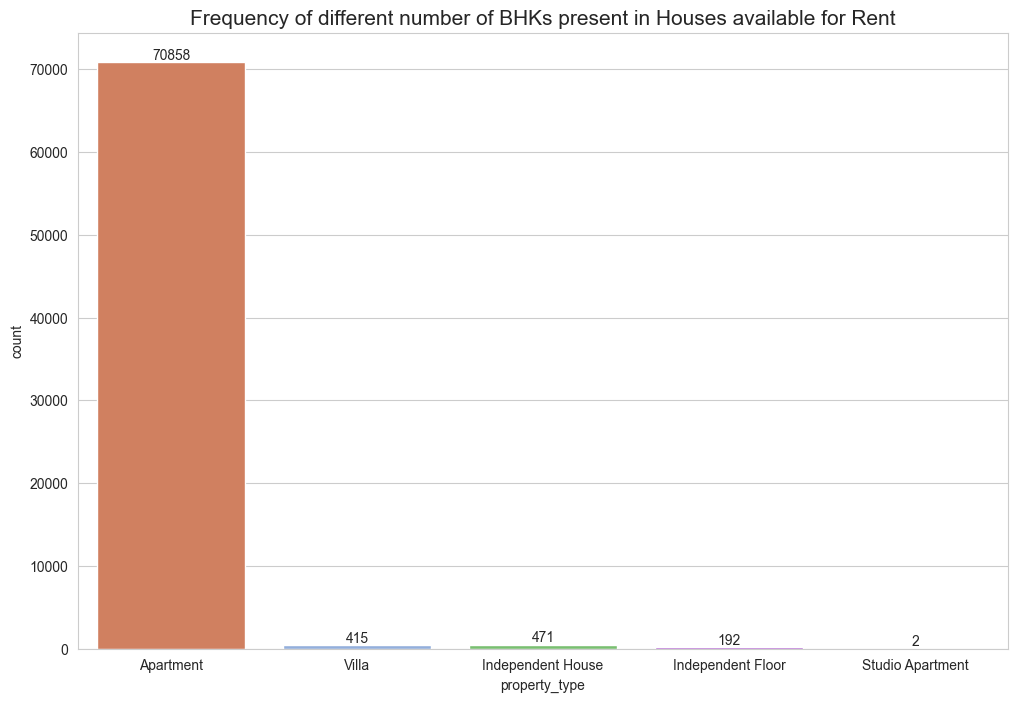

In [19]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='property_type',data=df, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of BHKs present in Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(df, names='property_type', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different number of BHKs present in Houses available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

In [20]:
fig = px.histogram(df,x='price',color_discrete_sequence = px.colors.qualitative.Set3, title=" Prices Distribution Histogram")
fig.show()
fig = px.box(df, x="price", title='Boxplot for Rent Prices')
fig.show()

### Checking the position of Outlier

In [21]:
print(np.where(df['price']> 2000000000))

(array([49988, 50031]),)


In [22]:
df.drop([49988, 50031], axis=0, inplace=True)

fig = px.box(df, x="price",title='Boxplot for Rent Prices')
fig.show()

In [23]:
# define numerical & categorical columns

numeric_features = [feature for feature in df if df[feature].dtype != 'O']
categorical_features = [feature for feature in df if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['price', 'bedroom_num', 'bathroom_num', 'balcony_num', 'latitude', 'longitude']

We have 4 categorical features : ['locality', 'city', 'property_type', 'furnished']


In [24]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

locality
Thane                      11.414313
Mira Road                   6.772687
Kandivali                   4.077235
Kharghar                    3.952124
Andheri                     3.713023
                             ...    
Police Colony               0.001390
Nehru Nagar, Kanjurmarg     0.001390
Amboli                      0.001390
Lokhandwala Andheri         0.001390
Napean Sea Road             0.001390
Name: proportion, Length: 408, dtype: float64
---------------------------
city
Mumbai            98.532028
Western Mumbai     0.679771
Central Mumbai     0.503225
Mumbai South       0.284976
Name: proportion, dtype: float64
---------------------------
property_type
Apartment            98.498665
Independent House     0.654749
Villa                 0.576902
Independent Floor     0.266904
Studio Apartment      0.002780
Name: proportion, dtype: float64
---------------------------
furnished
Unfurnished       69.388067
Semi-Furnished    23.709964
Furnished          6.901968
Name: pr

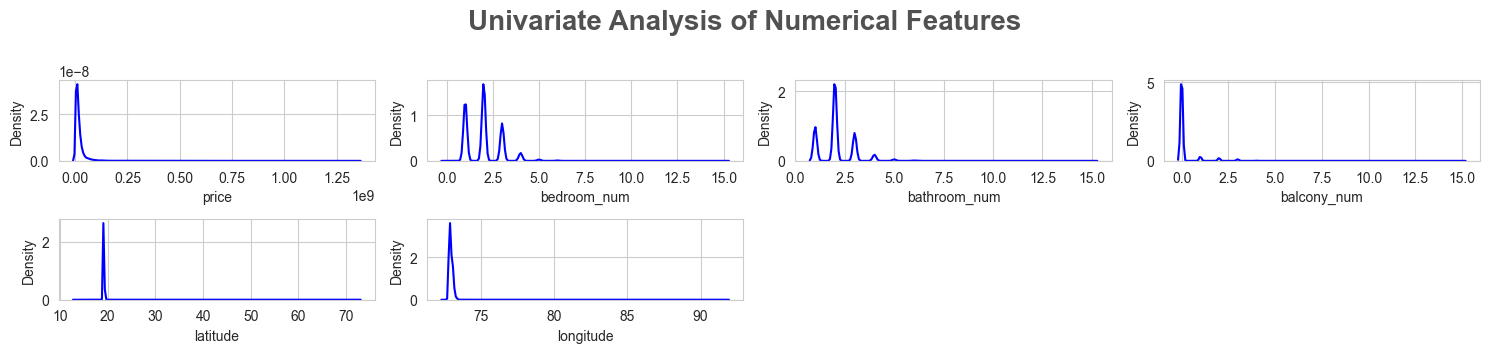

In [25]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(7, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

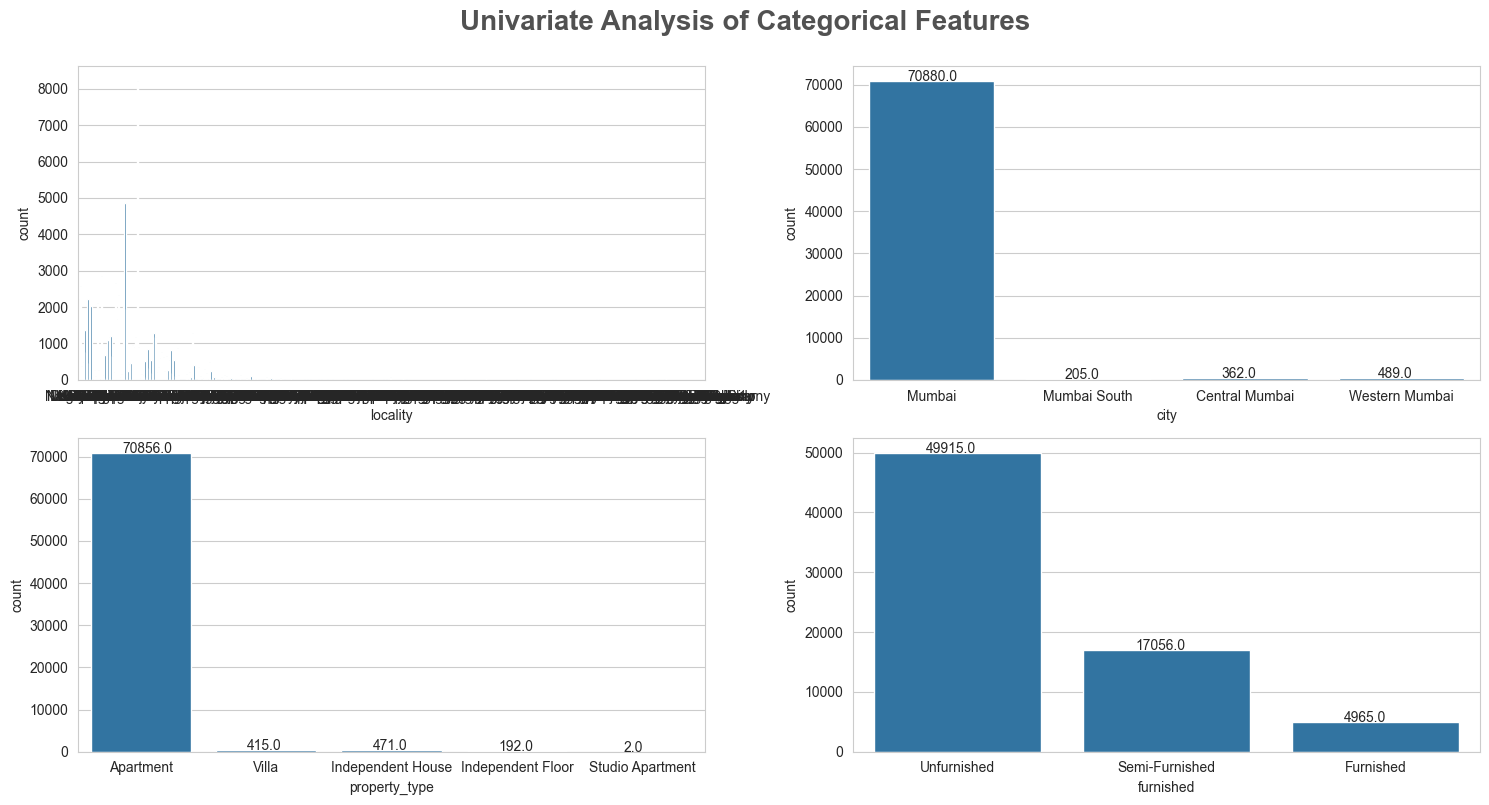

In [26]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(x=df[categorical_features[i]])
    if df[categorical_features[i]].value_counts().count() <10:
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    

### Check Multicollinearity in Numerical features

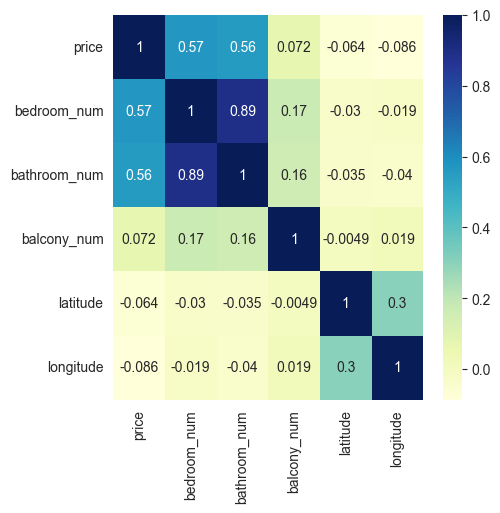

In [27]:
plt.figure(figsize = (5,5))
num_features = numeric_features.copy()


sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [28]:
df.isnull().sum()

price            0
locality         0
city             0
property_type    0
bedroom_num      0
bathroom_num     0
balcony_num      0
furnished        0
latitude         0
longitude        0
dtype: int64

### Multicollinearity Check
#### Variance Inflation Factor (VIF)
* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
* Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [29]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Names of continues features :',continuous_features)

Names of continues features : ['price', 'bedroom_num', 'bathroom_num', 'balcony_num', 'latitude', 'longitude']


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

        
#we will remove the datetime column which is not required for the vif checking
cont_features = continuous_features.copy()

# we will not chech vif for total spending, as it is the summation of Wines,Fruits,Meat,Fish,Sweets,Gold.
compute_vif(cont_features, df)

Variable       VIF
0         price  1.515992
1   bedroom_num  5.125698
2  bathroom_num  4.999712
3   balcony_num  1.032611
4      latitude  1.103463
5     longitude  1.110513

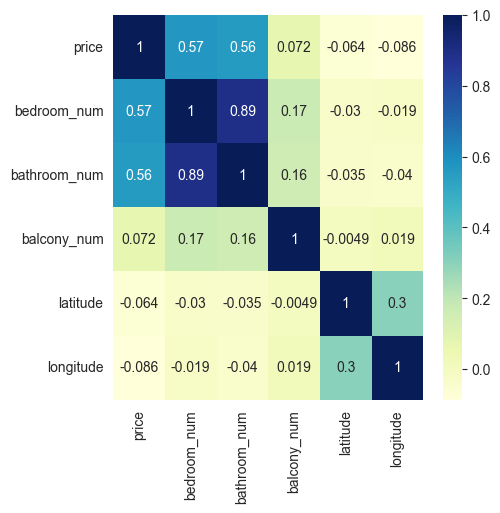

In [31]:
plt.figure(figsize = (5,5))
num_features = numeric_features.copy()


sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

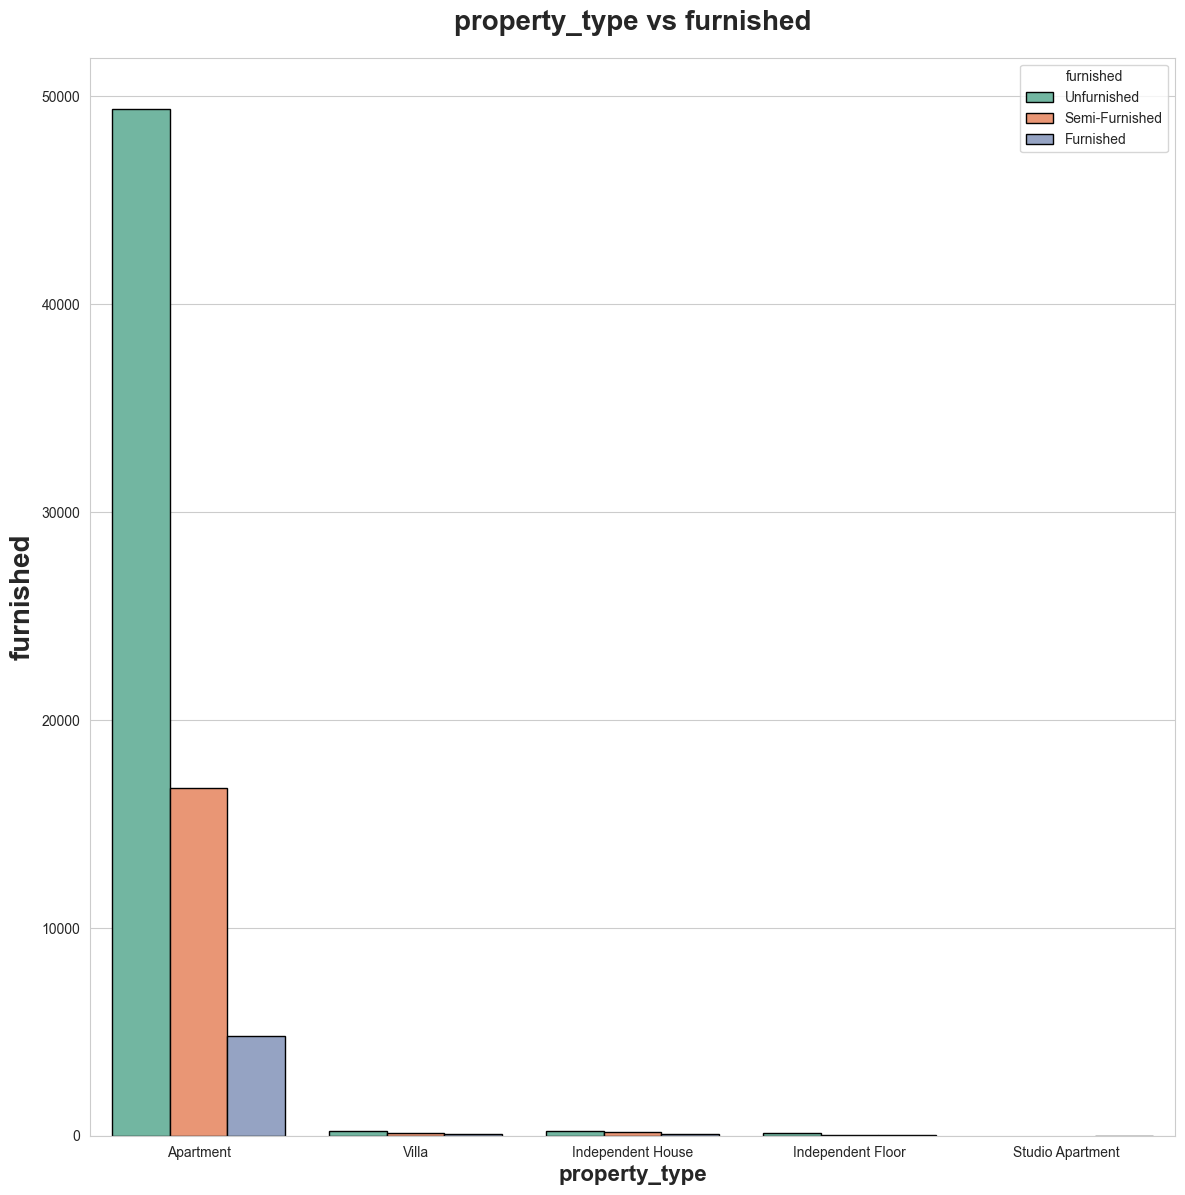

In [32]:
plt.subplots(figsize=(14,14))
sns.countplot(x="property_type",hue="furnished", data=df,ec = "black",palette="Set2")
plt.title("property_type vs furnished", weight="bold",fontsize=20, pad=20)
plt.ylabel("furnished", weight="bold", fontsize=20)
plt.xlabel("property_type", weight="bold", fontsize=16)
plt.show()

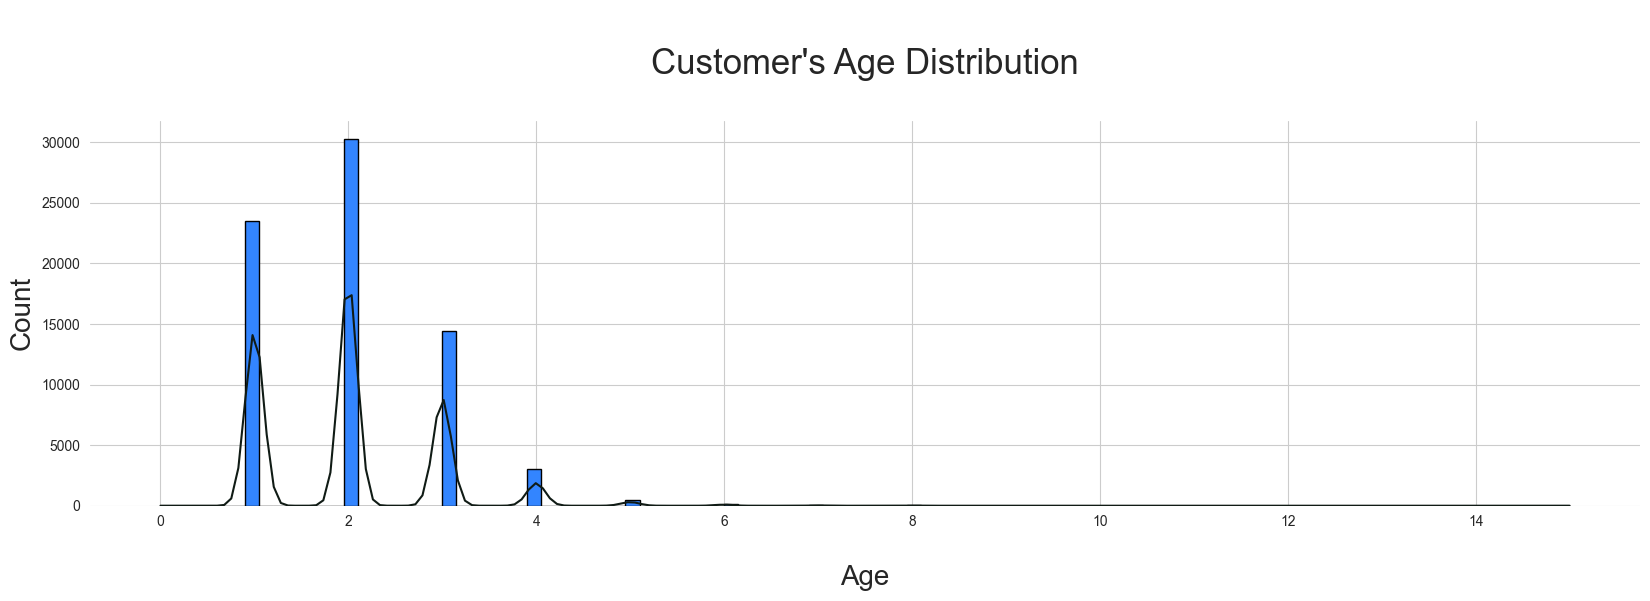

In [33]:
plt.subplots(figsize=(20, 5))
plt.title("Let's have a look on the distribution of customer's age :", weight="bold",fontsize=20, pad=20)

p = sns.histplot(df["bedroom_num"],color="#3385ff",kde=True,bins=100,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

* ✅ Key Findings  

    * Majority of properties are concentrated in a few top locations.

    * Higher BHK properties generally command higher prices, but with overlaps.

    * Furnishing status moderately affects pricing.

    * Strong positive correlation between BHK and Price.

    * Some high-priced outliers identified, possibly luxury listings

* 📌 Suggestions:

    * Outliers need domain verification — business stakeholders should validate.

    * Perform feature engineering on location (maybe group minor locations into 'Others').

    * Potential for ML model development using this clean, structured dataset.



#### Label Encoding (if categorical feature is ordinal — rare for locality)

In [38]:
from sklearn.preprocessing import LabelEncoder
import pickle

le_dict = {}
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le
    
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

In [36]:
#save model labels as new feature
import os
os.makedirs('EDA_data')
df.to_csv("./EDA_data/EDA_mumbai-house-price-data-cleaned.csv", index=False)